

## Decision Tree Classifier


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv("melb_tree_train.csv")
df_X = df[[c for c in df.columns if c != 'Type']]
s_y = df['Type']

df_X

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne
...,...,...,...,...,...,...,...,...,...,...
805,2,855000.0,11.4,2.0,1.0,1.0,158.0,106.0,1994.0,Glen Eira
806,2,696000.0,2.6,2.0,2.0,1.0,0.0,68.0,2008.0,Yarra
807,2,520000.0,9.9,2.0,1.0,1.0,0.0,82.0,2011.0,Moreland
808,3,815000.0,4.3,3.0,2.0,2.0,198.0,130.0,1990.0,Maribyrnong


## Implement a function to calculate entropy 


In [3]:
s_y.value_counts().index()

TypeError: 'Index' object is not callable

In [4]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
    vc = pd.Series(s_y).value_counts(normalize=True, sort=False)
    total = sum(vc)
    result = 0
    for v in vc.index:
        count = vc[v]
        temp = ((-count/total) * log2(count/total))
#         print(temp)
        result+= temp
    
    return result

In [5]:
# The entire data set
print(calc_entropy(s_y))

1.582533311426178


In [6]:
# Less than or equal to 200
low_df = df[df['Landsize'] <= 200]

calc_entropy(low_df['Type'])

1.3456432116206725

In [7]:
# Between 200 and 450
mid_df = df[(df['Landsize'] > 200)]
mid_df =  mid_df[mid_df['Landsize'] <= 450]

calc_entropy(mid_df['Type'])

1.4660501816027975

In [8]:
# greater than 450
high_df = df[df['Landsize'] > 450]

calc_entropy(high_df['Type'])

1.09954792005911

##  calculate the Gini Index


In [9]:
def calc_gini( s_y ):
    vc = pd.Series(s_y).value_counts(normalize=True, sort=False)
    total = sum(vc)
    result = 1
    for v in vc.index:
        count = vc[v]
        temp = (count/total)**2
        result -= temp
    
    return result

In [10]:
# The entire data set
print(calc_gini(s_y))

0.6655601280292637


In [11]:
# Less than or equal to 200
low_df = df[df['Landsize'] <= 200]

calc_gini(low_df['Type'])

0.5741211482422965

In [12]:
# Between 200 and 450
mid_df = df[(df['Landsize'] > 200)]
mid_df =  mid_df[mid_df['Landsize'] <= 450]

calc_gini(mid_df['Type'])

0.6101021682602731

In [13]:
# greater than 450
high_df = df[df['Landsize'] > 450]

calc_gini(high_df['Type'])

0.43819341715976323

## Create a decision tree 


In [14]:
enc = preprocessing.OneHotEncoder()

#FIT
c_area = df_X['CouncilArea']
temp_c_area= np.reshape(c_area.values, (c_area.shape[0], 1))
enc.fit(temp_c_area)

#Transform
c_onehotlabels = pd.DataFrame(enc.transform(temp_c_area).toarray())
c_onehotlabels.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_X_drop = df_X[[c for c in df_X.columns if c != 'CouncilArea']]

df_X_res = pd.concat([df_X_drop, c_onehotlabels], axis = 1)
df_X_res.shape

(810, 30)

In [16]:
# Create Tree
clf = DecisionTreeClassifier()

clf.fit(df_X_res, s_y)

DecisionTreeClassifier()

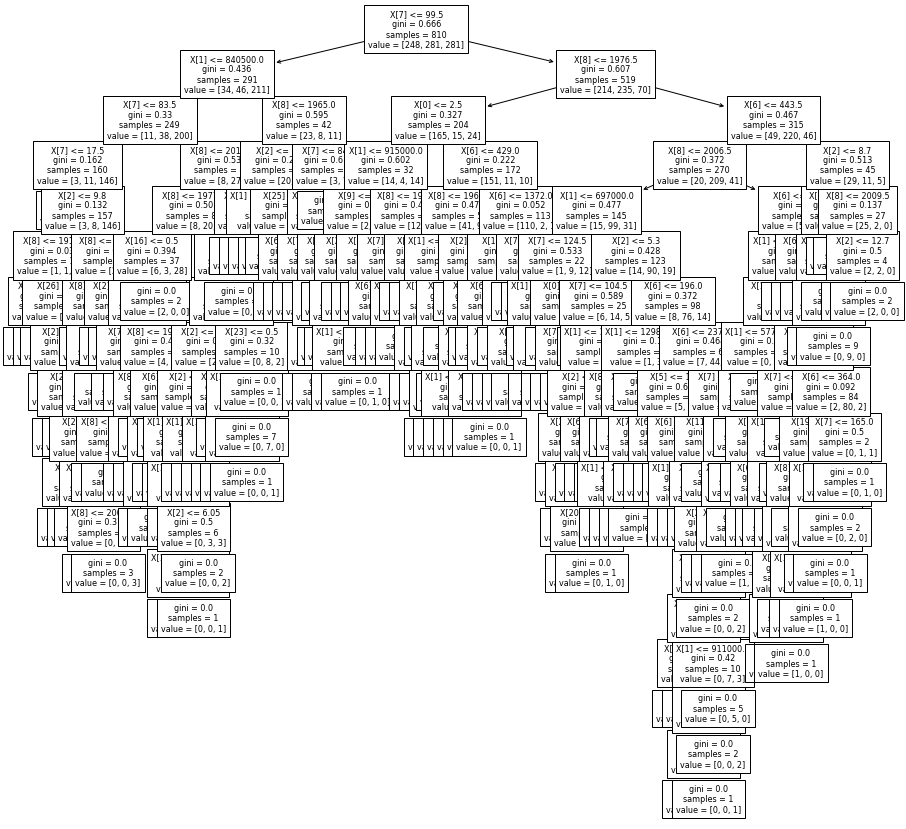

In [17]:
# Display text version of the tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf, fontsize=8)
plt.show()

In [18]:
# Display graphviz version of the tree
x = tree.export_graphviz(clf)

In [19]:
print(x)

digraph Tree {
node [shape=box] ;
0 [label="X[7] <= 99.5\ngini = 0.666\nsamples = 810\nvalue = [248, 281, 281]"] ;
1 [label="X[1] <= 840500.0\ngini = 0.436\nsamples = 291\nvalue = [34, 46, 211]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[7] <= 83.5\ngini = 0.33\nsamples = 249\nvalue = [11, 38, 200]"] ;
1 -> 2 ;
3 [label="X[7] <= 17.5\ngini = 0.162\nsamples = 160\nvalue = [3, 11, 146]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]"] ;
3 -> 4 ;
5 [label="X[2] <= 9.8\ngini = 0.132\nsamples = 157\nvalue = [3, 8, 146]"] ;
3 -> 5 ;
6 [label="X[8] <= 1915.0\ngini = 0.034\nsamples = 115\nvalue = [1, 1, 113]"] ;
5 -> 6 ;
7 [label="X[24] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]"] ;
7 -> 9 ;
10 [label="X[26] <= 0.5\ngini = 0.018\nsamples = 111\nvalue = [0, 1, 110]"] ;
6 -> 10 ;
11 [label="gini = 0.0\nsa

In [20]:
df_X_res

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,0,...,11,12,13,14,15,16,17,18,19,20
0,2,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,2,855000.0,11.4,2.0,1.0,1.0,158.0,106.0,1994.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,2,696000.0,2.6,2.0,2.0,1.0,0.0,68.0,2008.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
807,2,520000.0,9.9,2.0,1.0,1.0,0.0,82.0,2011.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
808,3,815000.0,4.3,3.0,2.0,2.0,198.0,130.0,1990.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The first split is at column BuildingArea, where BuildingArea is less than 99.5. 

## Calculate the Accuracy and Display Learning Curve


In [21]:
# Load in the test data
melb_test = pd.read_csv("melb_tree_test.csv")
type_test =  melb_test[["Type"]]
df_xtest = melb_test.drop(['Type'], axis=1)

df_xtest = df_xtest.drop(["CouncilArea"], 1)
df_xtest = pd.concat([df_xtest, pd.get_dummies(melb_test["CouncilArea"])], 1)

In [22]:
# Build the trees using the training data
depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
gini_train = []
entropy_train = []
gini_test = []
entropy_test = []

for i in depth:
    entropy_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    entropy_model.fit(df_X_res, s_y)
    
    gini_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i)
    gini_model.fit(df_X_res, s_y)
    
    y_pred = entropy_model.predict(df_xtest)
    entropy_test.append(1 - metrics.accuracy_score(type_test, y_pred))
    
    y_pred = gini_model.predict(df_xtest)
    gini_test.append(1 - metrics.accuracy_score(type_test, y_pred))
    
    y_pred = entropy_model.predict(df_X_res)
    entropy_train.append(1 - metrics.accuracy_score(s_y, y_pred))
    
    y_pred = gini_model.predict(df_X_res)
    gini_train.append(1 - metrics.accuracy_score(s_y, y_pred))

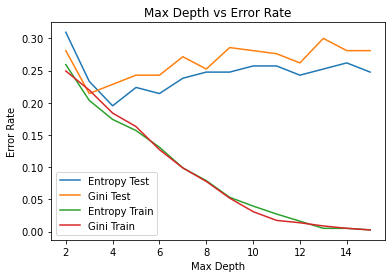

In [23]:
# Plot the 4 learning curves
plt.plot(depth, entropy_test, label = "Entropy Test")
plt.plot(depth, gini_test, label = "Gini Test")
plt.plot(depth, entropy_train, label = "Entropy Train")
plt.plot(depth, gini_train, label = "Gini Train")

plt.title("Max Depth vs Error Rate")
plt.xlabel("Max Depth")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

The accuracy of our model for the test data is only around 75% even though the training data increases in accuracy with depth. Therefore, there is no reason to go beyond 3 to 4 max depth as the accuracy of the test data does not increase with depth. 